In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data=pd.read_csv("/content/TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-11,158.102005,164.800003,157.000000,162.257996,162.257996,82598000
1,2020-05-12,165.399994,168.658005,161.600006,161.882004,161.882004,79534500
2,2020-05-13,164.166000,165.199997,152.660004,158.192001,158.192001,95327500
3,2020-05-14,156.000000,160.671997,152.800003,160.666000,160.666000,68411000
4,2020-05-15,158.070007,161.009995,157.309998,159.834000,159.834000,52592000


<function matplotlib.pyplot.show>

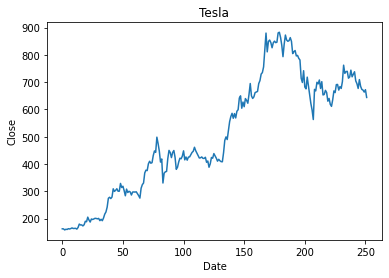

In [2]:
close=data['Close']
ax=close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show

In [3]:
data["Date"]=pd.to_datetime(data["Date"], infer_datetime_format=True)
data=data[["Date","Close"]]

In [4]:
data=data.rename(columns={"Date":"ds","Close":"y"})

In [5]:
model=Prophet()
model.fit(data)
predict= model.make_future_dataframe(periods=365)
forcast=model.predict(predict)
forcast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-05-06,201.568374,-340.257421,721.875501
613,2022-05-07,208.796163,-322.432068,728.471467
614,2022-05-08,207.537296,-314.824225,712.929147
615,2022-05-09,195.987549,-348.539280,713.558768
616,2022-05-10,198.319515,-337.379754,720.923276


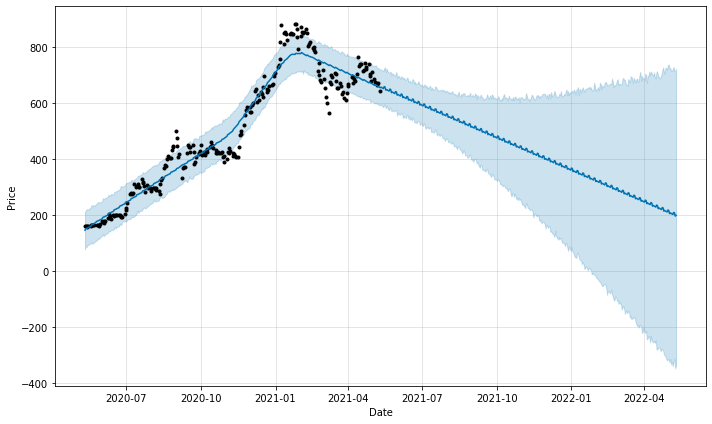

In [6]:
graph=model.plot(forcast, xlabel="Date", ylabel="Price")
